In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
IN_PATH = "/shared/3/projects/benlitterer/podcastData/podNames/podinfo1hr.csv"

In [50]:
df = pd.read_csv(IN_PATH, names = ["searchName", "hitName", "type", "languages", "description", "is_externally_hosted", "total_episodes"])

In [51]:
df.shape

(2334699, 7)

In [53]:
dupDf = df[df.duplicated(subset=["hitName", "description"], keep=False)].sort_values("hitName")

KeyboardInterrupt: 

In [ ]:
#just looking at the duplicate rows a bit... 
dupDf.iloc[400:403]

In [60]:
badDups = df[df.duplicated(subset=["searchName", "hitName"], keep=False)].sort_values(["searchName", "hitName"])

In [54]:
df = df.drop_duplicates(subset=["hitName", "description"])

In [55]:
df.shape

(467138, 7)

In [ ]:
df[df["hitName"].contains("")]

In [56]:
#we have nearly 300k unique podcast names to look for 
len(df["hitName"].unique())

447357

In [57]:
langCounts = pd.DataFrame(df.dropna(subset=["languages"])["languages"].apply(lambda x: x.split(",")[0]).value_counts())

langCounts=langCounts.rename(index={"en":"English", "de":"German","de":"Dutch", "ja":"Japanese", 
                         "fr":"French", "pl":"Polish", "es":"Spanish", "hi":"Hindi", "id":"Indonesian", "nl":"Dutch", "pa":"Punjabi"})
langCounts = langCounts.reset_index().head(20)

Text(0.5, 1.0, 'Language Counts')

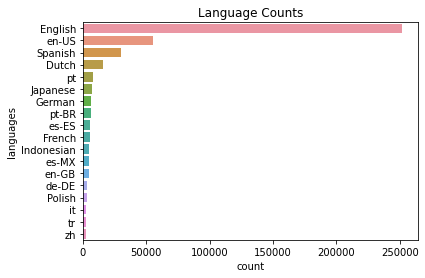

In [58]:
ax = sns.barplot(data=langCounts, x="count", y="languages", estimator="sum", errorbar=None) 
ax.set_title("Language Counts")

In [59]:
#ja:japanese, de:german, fr:french, pl:polish, es:spanish, hi:hindi , id:indonesian , nl: dutch, pa: punjabi 

Text(0.5, 1.0, 'Episode Count Distribution')

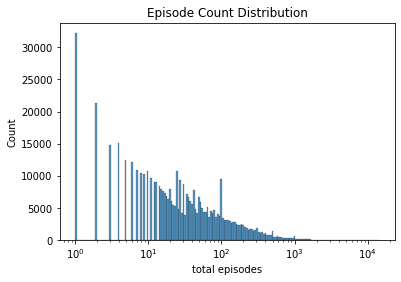

In [60]:
#number of episodes 
#interpretation: the majority of pods have between 10 and 1,000 episodes, with some going up to even 10,000
ax = sns.histplot(data=df[df["total_episodes"] > 0], x="total_episodes", log_scale=True)
ax.set_xlabel("total episodes")
ax.set_title("Episode Count Distribution")

Text(0.5, 1.0, 'Episode Count Distribution')

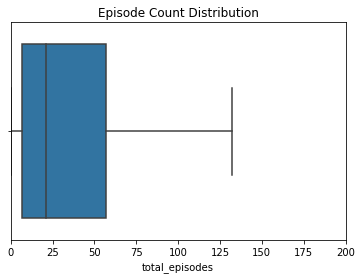

In [61]:
ax = sns.boxplot(data=df, x="total_episodes", showfliers=False)
ax.set_xlim(0, 200)
ax.set_title("Episode Count Distribution")

In [110]:
#get large podcasts
df.sort_values("total_episodes", ascending=False)[df["languages"].isin(["en", "en-US", "English"])].head(3)

<ipython-input-110-a6c680d4a63c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.sort_values("total_episodes", ascending=False)[df["languages"].isin(["en", "en-US", "English"])].head(3)


,searchName,hitName,type,languages,description,is_externally_hosted,total_episodes
242317,Drake Michigan,THE HUGE SHOW,show,en-US,"Live across Michigan every weekday, The Huge S...",False,11029
1073451,The Steve and Kyle Podcast,Best of The Steve Harvey Morning Show,show,en-US,Highlights from The Steve Harvey Morning Show,False,8457
315582,O Islam,Digital Islamic Reminder,show,en,Introducing Islamic thought and understanding ...,False,8205


In [115]:
df = df.dropna(subset=["description"])
df[df["description"].str.contains("Bret Weinstein")]

,searchName,hitName,type,languages,description,is_externally_hosted,total_episodes
63274,Wiser World,A Hunter-Gatherer's Guide to the 21st Century:...,show,English,"Author(s): Heather Heying, Bret Weinstein\nNar...",False,19
79116,Mental Dissonance,Summary of Heather Heying and Bret Weinstein's...,show,English,Author(s): Falcon Press\nNarrator(s): Paul Bar...,False,20
473576,The Hey Friend Podcast,The Dr. Debra Soh Podcast,show,en,Dr. Debra Soh (bestselling author of The End o...,False,54


In [119]:
df.loc[473576, "description"]

'Dr. Debra Soh (bestselling author of The End of Gender, sex neuroscientist, Oxford Union speaker) has brutally honest conversations with prominent intellectuals about the cultural and political issues affecting us today.  Guests include Steven Pinker, Dr. Drew Pinsky, Michael Shermer, Bret Weinstein, Heather Heying, Dr. Joseph Ladapo, James Lindsay, Chris Rufo, Duncan Sheik, David Frum, and more.  All episodes are science-based and family-friendly.  To learn more, visit DrDebraSoh.com'